In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, f_oneway, chi2_contingency, chi2


In [2]:
train_df = pd.read_csv('../dataset/train.csv')
test_df = pd.read_csv('../dataset/test.csv')
data = pd.concat([train_df, test_df])

In [3]:
#first 2 useless features removed
data = data.drop(train_df.iloc[:, [0,1]], axis=1)


In [4]:
data = data.dropna()


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129487 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129487 non-null  object 
 1   Customer Type                      129487 non-null  object 
 2   Age                                129487 non-null  int64  
 3   Type of Travel                     129487 non-null  object 
 4   Class                              129487 non-null  object 
 5   Flight Distance                    129487 non-null  int64  
 6   Inflight wifi service              129487 non-null  int64  
 7   Departure/Arrival time convenient  129487 non-null  int64  
 8   Ease of Online booking             129487 non-null  int64  
 9   Gate location                      129487 non-null  int64  
 10  Food and drink                     129487 non-null  int64  
 11  Online boarding                    129487 non

In [6]:
target_col = 'satisfaction'

categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class'] + data.columns[6:20].tolist()
data[categorical_cols] = data[categorical_cols].astype('category')

numeric_cols = [col for col in data.select_dtypes(include=['number']).columns if col != target_col]
alpha = 0.05

In [7]:
#categorical features vs target variable independence test
chi2_rows = []
target_as_category = data[target_col].astype('category')
for col in categorical_cols:
    contingency = pd.crosstab(data[col], target_as_category)
    chi2, p_value, dof, expected = chi2_contingency(contingency)
    chi2_rows.append({
        'feature': col,
        'chi2': chi2,
        'p_value': p_value,
        'dof': dof,
        'Hypothesis': 'dependent' if p_value < alpha else 'independent'
        })

chi2_feature_target_df = pd.DataFrame(chi2_rows).reset_index(drop=True)
chi2_feature_target_df


,feature,chi2,p_value,dof,Hypothesis
0,Gender,17.066755,3.608855e-05,1,dependent
1,Customer Type,4475.155051,0.000000e+00,1,dependent
2,Type of Travel,26195.139775,0.000000e+00,1,dependent
3,Class,32823.124030,0.000000e+00,2,dependent
4,Inflight wifi service,35772.821996,0.000000e+00,5,dependent
5,Departure/Arrival time convenient,599.595056,2.473802e-127,5,dependent
6,Ease of Online booking,12806.567645,0.000000e+00,5,dependent
7,Gate location,3062.281155,0.000000e+00,5,dependent
8,Food and drink,6546.211372,0.000000e+00,5,dependent
9,Online boarding,49369.524616,0.000000e+00,5,dependent


In [8]:
def plot_critical_region(chi2, critical_value, dof):
    x = np.linspace(0, chi2+ 10, 1000)
    y = stats.chi2.pdf(x, dof)

    plt.plot(x, y, label='Chi-squared Distribution', color='blue')
    plt.fill_between(x, y, where=(x >= critical_value), color='red', alpha=0.5, label='Critical Region')
    plt.axvline(x=chi2, color='green', linestyle='dashed', label='Chi-squared Statistic')
    plt.axvline(x=critical_value, color='red', linestyle='dashed', label='Critical Value')

    plt.title('Chi-squared Distribution with Critical Region')
    plt.xlabel('Chi-squared Value')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.show()

Contingency Table: 
 satisfaction            neutral or dissatisfied  satisfied
Inflight entertainment                                    
0                                            18          0
1                                         13414       2220
2                                         17240       4657
3                                         17311       6494
4                                         14253      22429
5                                         10989      20462

Expected Frequencies: 
 [[1.01790141e+01 7.82098589e+00]
 [8.84103925e+03 6.79296075e+03]
 [1.23827707e+04 9.51422934e+03]
 [1.34617462e+04 1.03432538e+04]
 [2.07436998e+04 1.59383002e+04]
 [1.77855652e+04 1.36654348e+04]]

Chi-squared value: 23027.54774688481
P-value: 0.0
Degrees of freedom: 5
We reject the null hypothesis. The values are dependent (there is an association between them).


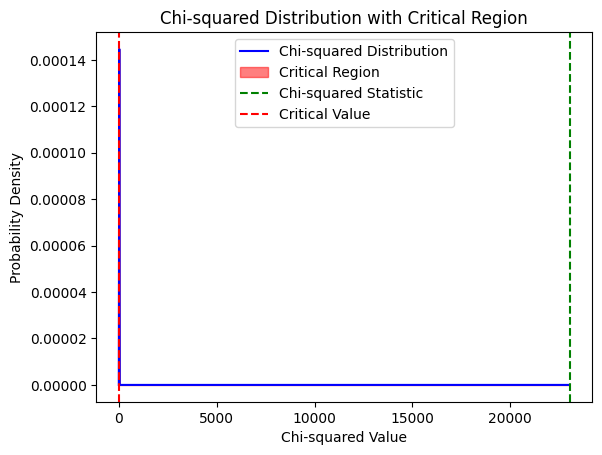

In [9]:
alpha = 0.05


contingency_table = pd.crosstab(data["Inflight entertainment"], target_as_category)
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Contingency Table:", "\n", contingency_table)
print("\nExpected Frequencies:", "\n", expected)

print(f"\nChi-squared value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
if p < alpha:
    print("We reject the null hypothesis. The values are dependent (there is an association between them).")
else:
    print("The values are independent (there is no association between them).")

critical_value = stats.chi2.ppf(1 - alpha, dof)
plot_critical_region(chi2, critical_value, dof)


In [10]:
satisfaction = {'neutral or dissatisfied': 0, 'satisfied': 1}
data[target_col] = data[target_col].map(satisfaction).astype('int')


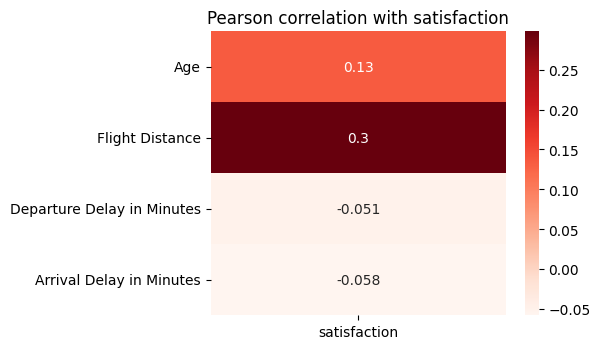

,satisfaction


In [11]:
# pearson correlation: numerical features vs numerical target
target_corr = data[numeric_cols + [target_col]].corr()[[target_col]].drop(index=target_col)
plt.figure(figsize=(6, len(target_corr)*0.4 + 2))
sns.heatmap(target_corr, annot=True, cmap=sns.color_palette('Reds', as_cmap=True))
plt.title('Pearson correlation with satisfaction')
plt.tight_layout()
plt.show()

strong_corr = target_corr[target_corr[target_col].abs() > 0.5].dropna()
strong_corr


In [12]:
anova_rows = []
for col in categorical_cols:
    groups = []
    for category in data[col].cat.categories:
        values = data.loc[data[col] == category, target_col].dropna()
        if len(values) > 1:
            groups.append(values)
    if len(groups) < 2:
        continue
    f_stat, p_value = f_oneway(*groups)
    anova_rows.append({
        'feature': col,
        'F_statistic': f_stat,
        'p_value': p_value,
        'Hypothesis': 'dependent' if p_value < alpha else 'independent'
        })

anova_df = pd.DataFrame(anova_rows).sort_values('p_value').reset_index(drop=True)
anova_df


,feature,F_statistic,p_value,Hypothesis
0,Food and drink,1378.891423,0.000000e+00,dependent
1,Checkin service,2162.906789,0.000000e+00,dependent
2,Baggage handling,2942.992529,0.000000e+00,dependent
3,Leg room service,3437.906879,0.000000e+00,dependent
4,On-board service,3217.892859,0.000000e+00,dependent
5,Inflight entertainment,5601.437630,0.000000e+00,dependent
6,Seat comfort,5725.154078,0.000000e+00,dependent
7,Online boarding,15957.605719,0.000000e+00,dependent
8,Cleanliness,2864.908686,0.000000e+00,dependent
9,Gate location,783.744487,0.000000e+00,dependent
